# Data Definition

Description:
* id: id unik untuk setiap perjalanan
* driver_id: id pengemudi
* passenger_id: id penumpang
* city_id: asal kota perjalanan
* call_time: waktu pemesanan perjalanan
* finish_time: waktu perjalanan selesai
* surge_rate: nilai kenaikan tarif dinamis pada saat peak hours
* trip_distance: jarak tempuh dalam km
* trip_fare: biaya/tarif perjalanan
* first_call_time : waktu/tanggal pemesanan perjalanan pertama dari passenger
* city: nama kota. Total ada 10 kota pada dataset ini
* calendar_date: tanggal dalam format MM/DD/YYYY
* week_day: nama-nama hari dalam seminggu, senin-minggu
* holiday: apakah tanggal tersebut adalah libur (1) atau tidak (0), total ada 35 hari libur dari periode 2018-01-01 sampai 2020-12-31
* is_weekend: menentukan apakah akhir pekan (1) atau tidak (0)

## Import Library and Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
pd.options.display.max_columns = None

In [3]:
PATH_DATA_RAW= '../Dataset/Raw/'
PATH_DATA_CLEAN = '../Dataset/Clean/'

In [4]:
df = joblib.load(PATH_DATA_CLEAN+'clean_data.pkl')

# Check General Info From Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2295112 entries, 0 to 2318356
Data columns (total 18 columns):
 #   Column                Dtype         
---  ------                -----         
 0   trip_id               object        
 1   driver_id             object        
 2   passenger_id          object        
 3   city_id               int64         
 4   call_time             datetime64[ns]
 5   finish_time           datetime64[ns]
 6   surge_rate            float64       
 7   trip_distance         float64       
 8   trip_fare             float64       
 9   date_id               int64         
 10  calendar_date         datetime64[ns]
 11  week_day              object        
 12  holiday               int64         
 13  is_weekend            int64         
 14  first_call_time       datetime64[ns]
 15  city                  object        
 16  finish_time_date      datetime64[ns]
 17  first_call_time_date  datetime64[ns]
dtypes: datetime64[ns](6), float64(3), int64(4)

In [6]:
df.head()

,trip_id,driver_id,passenger_id,city_id,call_time,finish_time,surge_rate,trip_distance,trip_fare,date_id,calendar_date,week_day,holiday,is_weekend,first_call_time,city,finish_time_date,first_call_time_date
0,a84c0db2,cb64172e,2ea4359d,43006,2019-09-08 22:00:00,2019-09-08 22:00:00,0.3,1.92,4.36,47339,2019-09-08,Sunday,0,1,2018-08-18 10:00:00,Minas Tirith,2019-09-08,2018-08-18
1,a84c2d10,3034e6fe,e1bd0c8d,43006,2019-07-01 20:00:00,2019-07-01 21:00:00,0.0,9.36,6.91,47270,2019-07-01,Monday,0,0,2019-04-16 23:00:00,Minas Tirith,2019-07-01,2019-04-16
2,a84c3e75,93fb6802,75e6d450,43050,2019-08-20 21:00:00,2019-08-20 21:00:00,0.0,4.39,3.48,47320,2019-08-20,Tuesday,0,0,2018-08-17 01:00:00,Gondor,2019-08-20,2018-08-17
3,a84c3f6f,25fc9273,5ba48e89,43020,2019-09-08 02:00:00,2019-09-08 02:00:00,0.0,2.04,1.54,47339,2019-09-08,Sunday,0,1,2019-05-10 05:00:00,Isengard,2019-09-08,2019-05-10
4,a84c5ce2,484c4d0c,fdb2ef59,43006,2019-06-10 09:00:00,2019-06-10 09:00:00,0.0,7.37,5.83,47249,2019-06-10,Monday,0,0,2018-10-06 20:00:00,Minas Tirith,2019-06-10,2018-10-06


In [7]:
numerical = []
categorical = []
date_data = []
for i in df.columns:
    if (df[i].dtypes == 'float64') or (df[i].dtypes == 'int64'):
        numerical.append(i)
    elif (df[i].dtypes == 'object'):
        categorical.append(i)
    else:
        date_data.append(i)
print(numerical)
print(categorical)
print(date_data)

['city_id', 'surge_rate', 'trip_distance', 'trip_fare', 'date_id', 'holiday', 'is_weekend']
['trip_id', 'driver_id', 'passenger_id', 'week_day', 'city']
['call_time', 'finish_time', 'calendar_date', 'first_call_time', 'finish_time_date', 'first_call_time_date']


# Statistika Deskriptif

In [8]:
df[numerical].describe()

,city_id,surge_rate,trip_distance,trip_fare,date_id,holiday,is_weekend
count,2.295112e+06,2.295112e+06,2.295112e+06,2.295112e+06,2.295112e+06,2.295112e+06,2.295112e+06
mean,4.311784e+04,4.524086e-02,6.287267e+00,5.251027e+00,4.728409e+04,1.585544e-02,3.309451e-01
std,1.016309e+02,1.595365e-01,5.603099e+00,4.169748e+00,4.187170e+01,1.249162e-01,4.705534e-01
min,4.300600e+04,-1.000000e+00,-5.000000e-01,0.000000e+00,4.720900e+04,0.000000e+00,0.000000e+00
25%,4.302000e+04,0.000000e+00,2.580000e+00,2.740000e+00,4.724800e+04,0.000000e+00,0.000000e+00
50%,4.311600e+04,0.000000e+00,4.600000e+00,4.030000e+00,4.728400e+04,0.000000e+00,0.000000e+00
75%,4.317900e+04,0.000000e+00,8.280000e+00,6.470000e+00,4.732100e+04,0.000000e+00,1.000000e+00
max,4.327800e+04,4.000000e+00,2.961000e+02,1.234320e+03,4.735400e+04,1.000000e+00,1.000000e+00


* Pada kolom surge_rate dan trip_distance sepertinya ada nilai yang tidak masuk akal yaitu nilai negatif. Baris-baris yang memiliki negatif tersebut akan dihapus
* Nilai 0 pada kolom trip_fare juga tidak masuk akal, sehingga baris dengan trip_fare bernilai 0 akan dihapus.
* Kolom trip_distance dan trip_fare tampaknya memiliki outlier, dengan nilai maksimum yang sangat jauh lebih tinggi daripada mean dan median. Namun nilai outlier tersebut masih masuk akal nilainya.
* Kolom holiday adalah kolom diskrit

In [9]:
df = df[(df['surge_rate']>=0)&(df['trip_distance']>0)&(df['trip_fare']>0)]
df.shape

(2260874, 18)

In [10]:
df[numerical].describe()

,city_id,surge_rate,trip_distance,trip_fare,date_id,holiday,is_weekend
count,2.260874e+06,2.260874e+06,2.260874e+06,2.260874e+06,2.260874e+06,2.260874e+06,2.260874e+06
mean,4.311757e+04,4.749141e-02,6.322597e+00,5.224531e+00,4.728423e+04,1.586024e-02,3.312086e-01
std,1.018035e+02,1.564832e-01,5.590996e+00,4.097703e+00,4.183532e+01,1.249348e-01,4.706480e-01
min,4.300600e+04,0.000000e+00,1.000000e-02,1.000000e-02,4.720900e+04,0.000000e+00,0.000000e+00
25%,4.302000e+04,0.000000e+00,2.610000e+00,2.740000e+00,4.724800e+04,0.000000e+00,0.000000e+00
50%,4.311600e+04,0.000000e+00,4.630000e+00,4.020000e+00,4.728500e+04,0.000000e+00,0.000000e+00
75%,4.317900e+04,0.000000e+00,8.300000e+00,6.440000e+00,4.732100e+04,0.000000e+00,1.000000e+00
max,4.327800e+04,4.000000e+00,2.961000e+02,1.234320e+03,4.735400e+04,1.000000e+00,1.000000e+00


In [11]:
colom = ['holiday','is_weekend']
for i in colom:
    print("*",i)
    print(df[i].value_counts())
    print('--------------------')

* holiday
0    2225016
1      35858
Name: holiday, dtype: int64
--------------------
* is_weekend
0    1512053
1     748821
Name: is_weekend, dtype: int64
--------------------


In [12]:
df[categorical].describe()

,trip_id,driver_id,passenger_id,week_day,city
count,2260874,2260874,2260874,2260874,2260874
unique,2260874,142987,1175267,7,6
top,a84c0db2,e38a1cc4,67f26daa,Saturday,The Shire
freq,1,194,48,376285,479055


* Total driver ada sebanyak 142.987 orang, dan total penumpang ada sebanyak 1.175.267 orang
* Jumlah driver jauh lebih sedikit daripada jumlah penumpang. Hal ini bisa memungkinkan terjadinya kesulitan dalam menemukan driver ketika permintaan dari jumlah penumpang tinggi daripada jumlah driver yang tersedia.
* Total trip ada sebanyak 2.260.874

In [13]:
colom = ['week_day','city']
for i in colom:
    print("*",i)
    print(df[i].value_counts())
    print('--------------------')

* week_day
Saturday     376285
Sunday       372536
Friday       327428
Monday       306579
Thursday     304818
Wednesday    292580
Tuesday      280648
Name: week_day, dtype: int64
--------------------
* city
The Shire       479055
Minas Tirith    411268
Rivendell       373292
Rohan           354905
Isengard        331034
Gondor          311320
Name: city, dtype: int64
--------------------


* Perjalanan paling banyak terjadi pada akhir pekan (weekend).
* Kota dengan jumlah perjalanan terbanyak adalah The Shire dan paling sedikit adalah Gondor.

In [14]:
df[date_data].describe()

C:\Users\ramad\AppData\Local\Temp\ipykernel_10468\3799866994.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[date_data].describe()
C:\Users\ramad\AppData\Local\Temp\ipykernel_10468\3799866994.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[date_data].describe()
C:\Users\ramad\AppData\Local\Temp\ipykernel_10468\3799866994.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df

,call_time,finish_time,calendar_date,first_call_time,finish_time_date,first_call_time_date
count,2260874,2260874,2260874,2260874,2260874,2260874
unique,3459,3456,146,18452,144,788
top,2019-09-07 06:00:00,2019-09-07 07:00:00,2019-09-07 00:00:00,2019-04-07 03:00:00,2019-09-07 00:00:00,2019-05-12 00:00:00
freq,1419,1491,20738,750,20805,6646
first,2019-05-01 16:00:00,2019-05-03 00:00:00,2019-05-01 00:00:00,2017-07-17 21:00:00,2019-05-03 00:00:00,2017-07-17 00:00:00
last,2019-09-23 23:00:00,2019-09-23 23:00:00,2019-09-23 00:00:00,2019-09-23 23:00:00,2019-09-23 00:00:00,2019-09-23 00:00:00


* Data ini mencakup periode dari tanggal 2019-05-01 hingga 2019-09-23, dengan jumlah trip ada sebanyak 2.260.874 perjalanan.
* Puncak kejadian perjalanan harian tercatat pada tanggal 2019-09-07, dengan total trip mencapai 20.738 perjalanan.
* Pada tanggal 2019-05-12, terjadi peningkatan signifikan dalam penggunaan layanan trip oleh penumpang baru, dengan jumlah mencapai 6.646 penumpang baru.

# Distribution Data

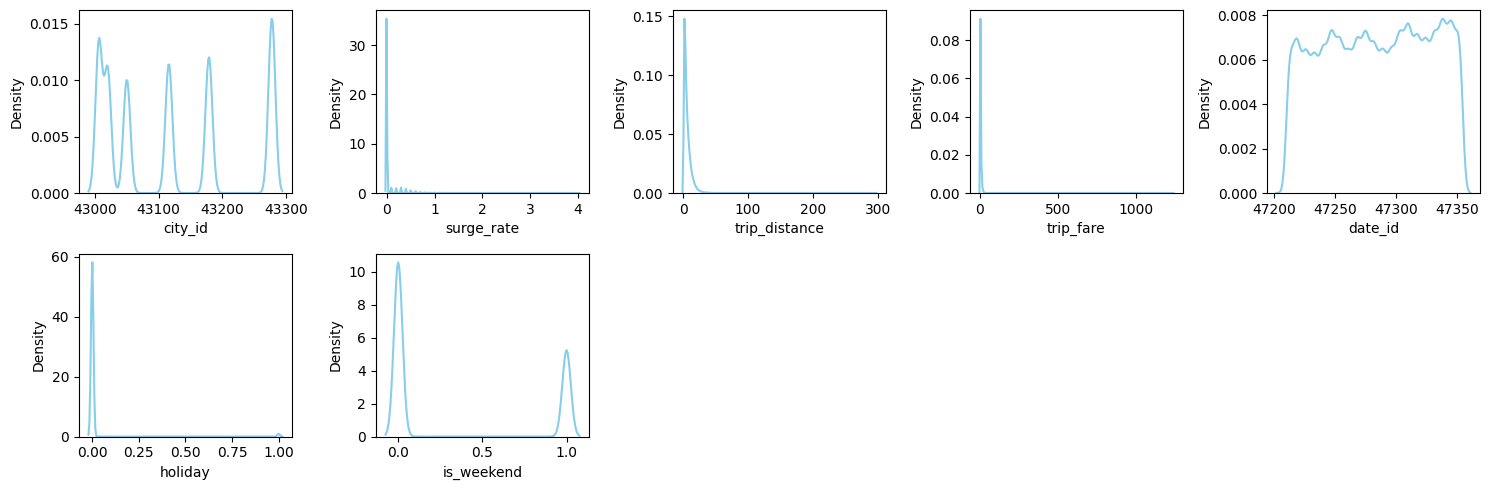

In [15]:
plt.figure(figsize=(15,5))

features = numerical
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 2, i+1)
    sns.kdeplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

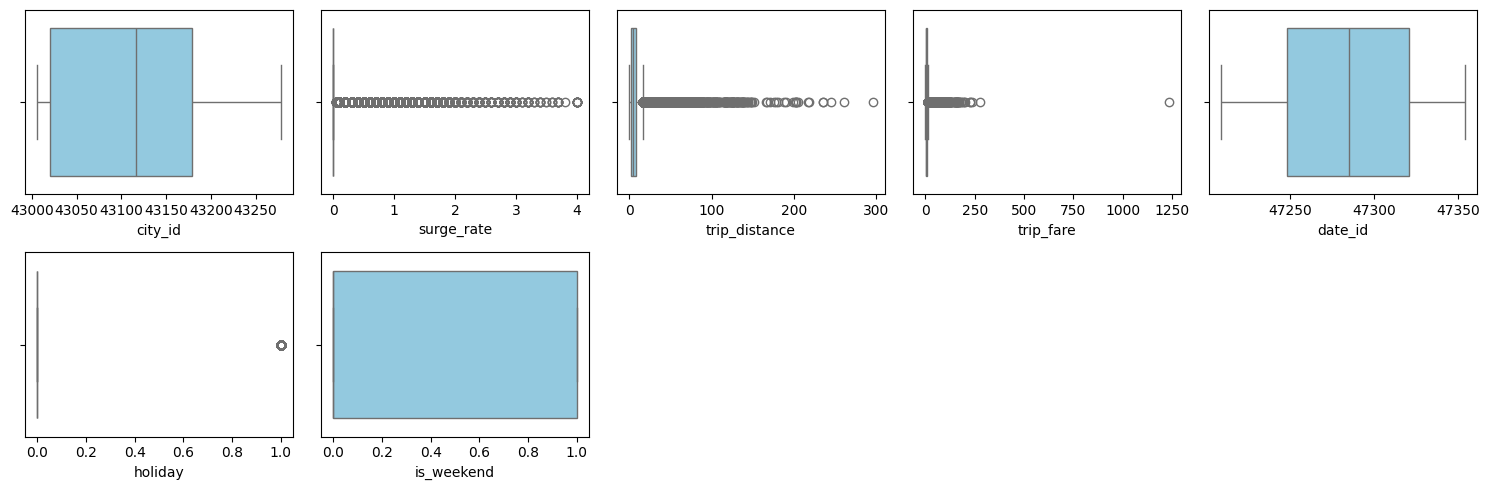

In [16]:
plt.figure(figsize=(15,5))

features = numerical
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 2, i+1)
    sns.boxplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

* Terlihat surge rate sering kali memiliki nilai 0, hal ini mungkin menunjukkan bahwa pada sebagian besar perjalanan, tidak terjadi peningkatan tarif (surge) atau peningkatan tarifnya sangat kecil.
* Pada kolom trip_fare terdapat satu outlier yang mencurigakan karena nilainya sangat jauh dibandingkan dengan yang lainnya, sehingga perlu dilakukan pemeriksaan lebih lanjut.
* Nilai pada kolom trip distance dan trip fare akan dibatasi (dicapping) untuk mengamati distribusinya secara lebih jelas.

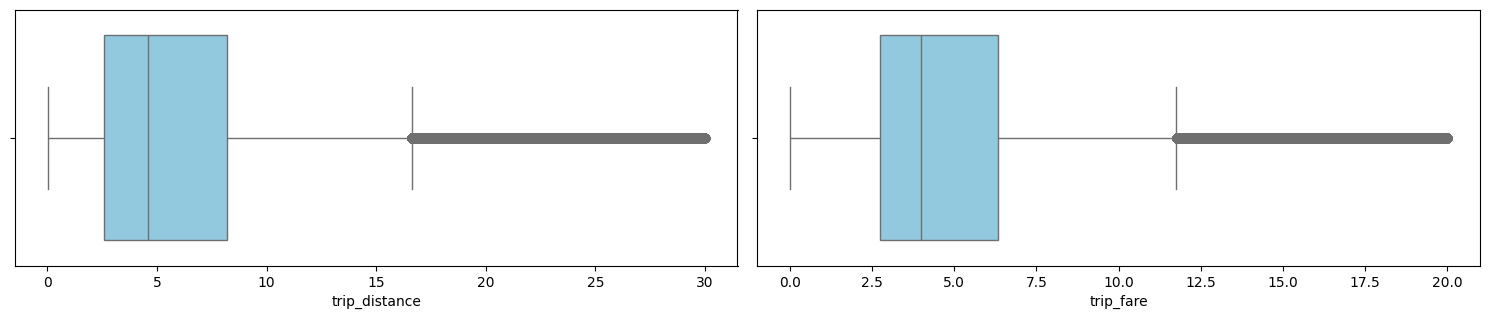

In [17]:
# adjust the figure size for better readability
plt.figure(figsize=(15,6))
cap = 10**5

features = ['trip_distance','trip_fare']
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    if features[i] == 'trip_distance':
        cap = 30
    elif features[i] == 'trip_fare':
        cap = 20
    temp = df.copy()
    x = temp[temp[features[i]]<cap][features[i]]
    sns.boxplot(x=x, color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

* Pada umumnya, perjalanan memiliki jarak sepanjang 2.5 km hingga 8 km, dapat diambil tindakan untuk menyesuaikan strategi tarif, penempatan driver, atau promosi khusus pada jarak-jarak tersebut.
* Umumnya, tarif perjalanan yang terjadi berkisar antara 2.6 hingga 7 dolar.

In [18]:
df[df['trip_fare']==1234.32]

,trip_id,driver_id,passenger_id,city_id,call_time,finish_time,surge_rate,trip_distance,trip_fare,date_id,calendar_date,week_day,holiday,is_weekend,first_call_time,city,finish_time_date,first_call_time_date
765131,03b546d8,0e35f1fc,55cac309,43278,2019-07-19 13:00:00,2019-07-19 13:00:00,0.0,0.13,1234.32,47288,2019-07-19,Friday,0,0,2018-09-07 12:00:00,The Shire,2019-07-19,2018-09-07


* Sepertinya ini adalah hal yang tidak masuk akal, karena jarak perjalanan ini sangat dekat namun tarifnya sangat besar
* Maka dari itu baris ini akan dihapus

In [19]:
df = df[df['trip_fare']!=1234.32]

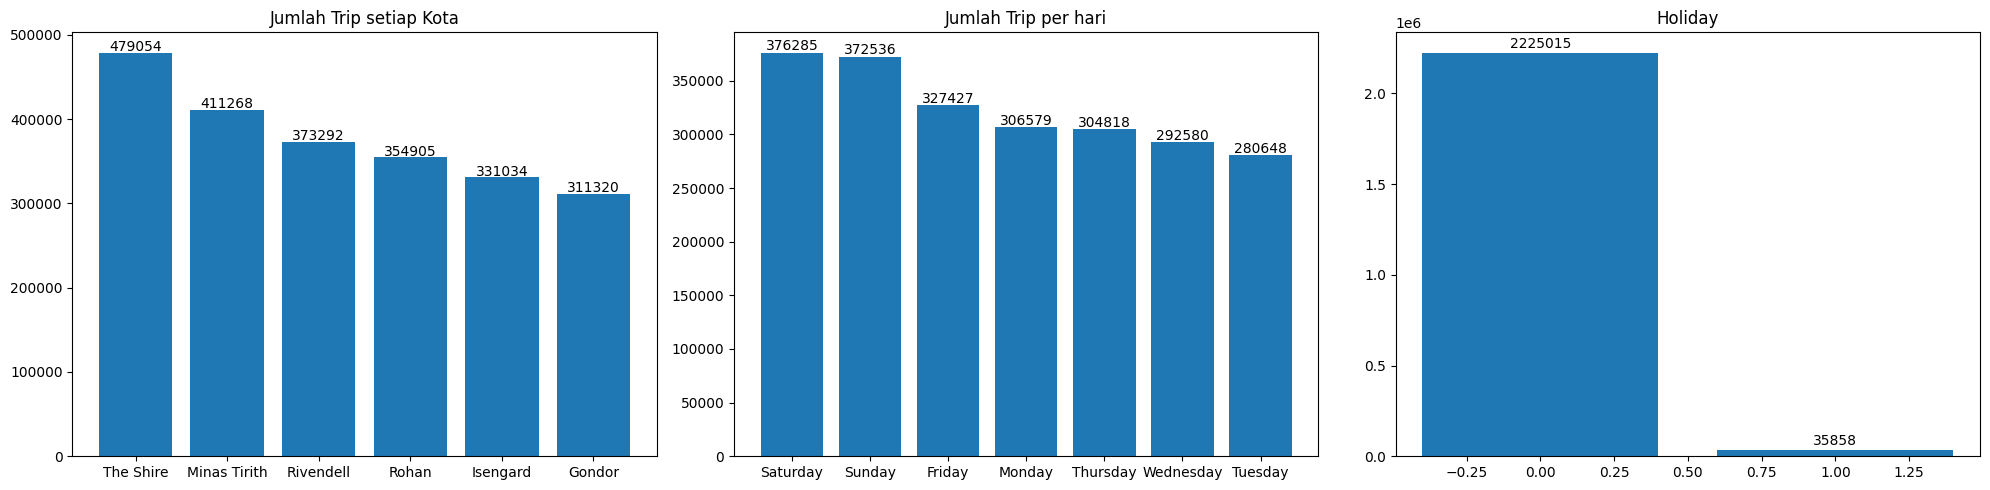

In [20]:
# Ukuran keseluruhan figure
plt.figure(figsize=(20, 5))

# Subplot 1
plt.subplot(1, 3, 1)
ax1 = plt.bar(x=df['city'].value_counts().index, height=df['city'].value_counts().values)
for p in ax1.patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height() - 10000),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Jumlah Trip setiap Kota')

# Subplot 2
plt.subplot(1, 3, 2)
ax2 = plt.bar(x=df['week_day'].value_counts().index, height=df['week_day'].value_counts().values)
for p in ax2.patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height() - 7000),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Jumlah Trip per hari')

# Subplot 3
plt.subplot(1, 3, 3)
ax3 = plt.bar(x=df['holiday'].value_counts().index, height=df['holiday'].value_counts().values)
for p in ax3.patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height() - 30000),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Holiday')

# Menampilkan semua subplot
plt.tight_layout()
plt.show()

* Kota dengan jumlah trip tertinggi adalah The Shire, sedangkan yang terendah terdapat di Gondor. Dari hal tersebut upayakan untuk menjaga kualitas layanan di kota The Shire dan mungkin bisa memperluas jangkauan layanan trip pada Kota Gondor.
* Jumlah trip paling tinggi terjadi pada hari Sabtu dan Minggu, sementara yang paling rendah terjadi pada hari Selasa. Hal ini mungkin terjadi karena pada akhir pekan banyak orang yang memiliki waktu luang dan menggunakan layanan trip untuk aktivitas rekreasi atau perjalanan liburan. Hal lain juga bisa mempengaruhi adalah kemungkinan seringnya ada event khusus pada akhir pekan sehingga banyak orang datang dari luar kota untuk datang ke event tersebut.

C:\Users\ramad\AppData\Local\Temp\ipykernel_10468\3536471436.py:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


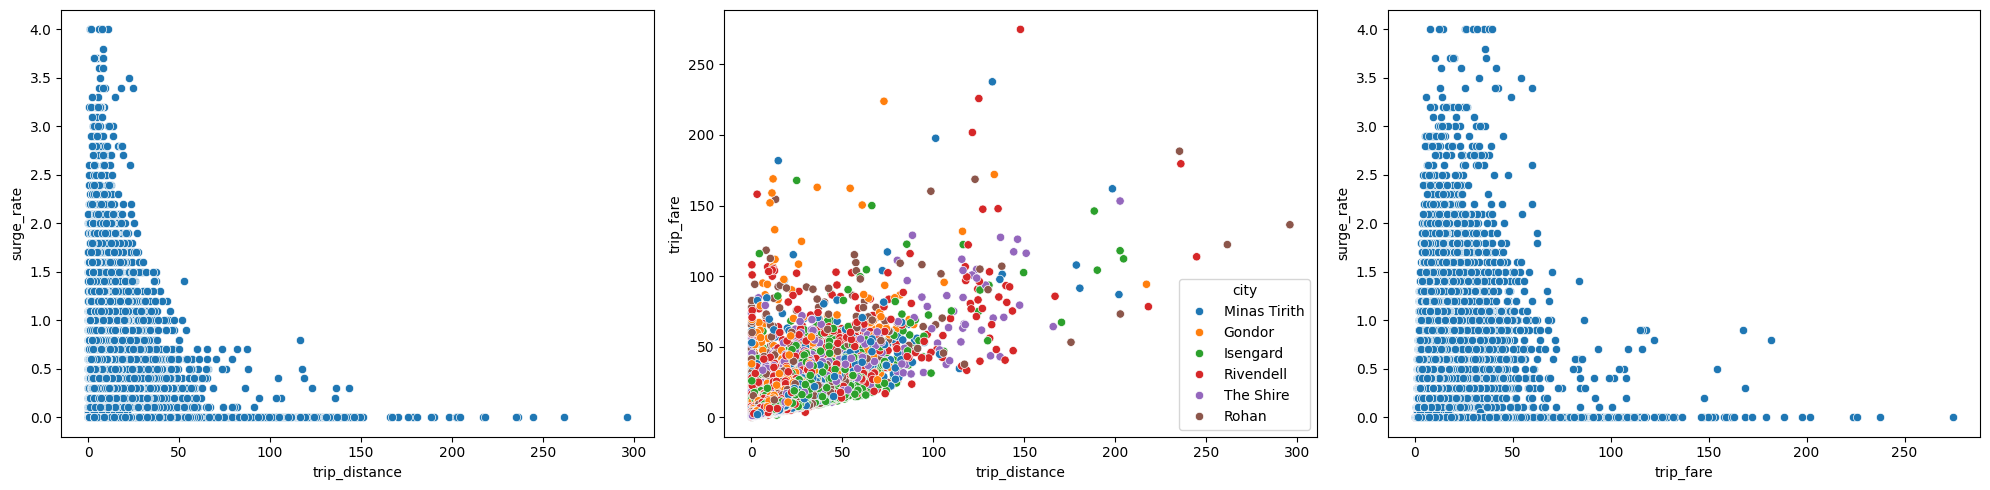

In [21]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=df['trip_distance'], y=df['surge_rate'])

plt.subplot(1, 3, 2)
sns.scatterplot(x=df['trip_distance'], y=df['trip_fare'], hue=df['city'])

plt.subplot(1, 3, 3)
sns.scatterplot(x=df['trip_fare'], y=df['surge_rate'])

plt.tight_layout()
plt.show()

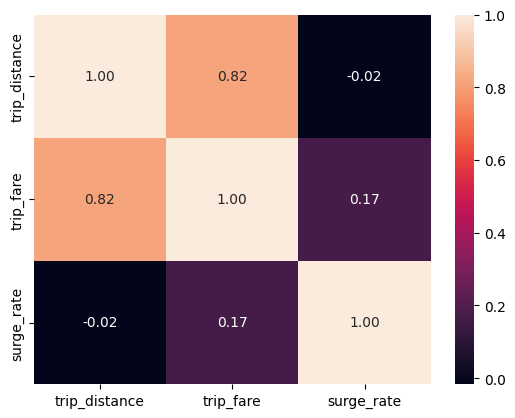

In [22]:
correlation = df[['trip_distance', 'trip_fare', 'surge_rate']].corr()
sns.heatmap(correlation, annot=True, fmt='.2f')
plt.show()

* Dilihat dari scatter plot dan heatmap correlation, tidak terdapat hubungan linear kuat antara surge_rate dengan trip_fare maupun trip_distance. Hal ini dapat dipahami karena surge_rate biasanya meningkat saat terjadi tingkat permintaan yang tinggi atau kondisi cuaca ekstrem. Kenaikan surge_rate bertujuan untuk menarik lebih banyak driver dalam menghadapi peningkatan permintaan atau mengatasi situasi yang tidak biasa, seperti cuaca ekstrem.
* Semakin jauh jarak tempuh penumpang, semakin tinggi tarifnya, sebuah fenomena yang umum terjadi dalam layanan transportasi.

# Business Question

### 1. Berapa biaya perjalanan rata-rata untuk liburan? Bagaimana perbandingannya dengan hari biasa?

In [23]:
df.groupby('holiday')['trip_fare'].mean()

holiday
0    5.220854
1    5.418384
Name: trip_fare, dtype: float64

In [24]:
df.groupby('is_weekend')['trip_fare'].mean()

is_weekend
0    5.149442
1    5.374513
Name: trip_fare, dtype: float64

### 2. Berapa rata-rata jumlah perjalanan yang dilakukan oleh setiap pengemudi pada setiap hari dalam seminggu?

In [25]:
trips_per_driver_per_day = df.groupby(['driver_id', 'week_day'])['trip_id'].count().reset_index()
trips_per_driver_per_day.sort_values('trip_id', ascending=False)

,driver_id,week_day,trip_id
637988,facfecce,Sunday,43
24113,09a8b969,Wednesday,39
24812,09eeee44,Sunday,39
24108,09a8b969,Monday,39
230639,5b0e66b0,Sunday,39
...,...,...,...
329591,81d740f4,Wednesday,1
329588,81d740f4,Saturday,1
329587,81d740f4,Monday,1
329586,81d740f4,Friday,1


In [26]:
average_trips_per_driver_per_day = trips_per_driver_per_day.groupby('week_day')['trip_id'].mean().reset_index()
average_trips_per_driver_per_day.rename(columns={'trip_id':'trips_per_driver_per_day'}, inplace=True)
average_trips_per_driver_per_day.sort_values('trips_per_driver_per_day',ascending=False)

,week_day,trips_per_driver_per_day
3,Sunday,3.970710
2,Saturday,3.761233
1,Monday,3.458347
0,Friday,3.398661
4,Thursday,3.281706
6,Wednesday,3.216508
5,Tuesday,3.170698


### 3. Hari apa dalam seminggu yang biasanya pengemudi menempuh jarak paling jauh secara rata-rata?

In [27]:
average_distance_per_day = df.groupby('week_day')['trip_distance'].mean().reset_index()
average_distance_per_day.sort_values('trip_distance', ascending=False)

,week_day,trip_distance
3,Sunday,6.685396
1,Monday,6.529234
2,Saturday,6.379925
0,Friday,6.202339
5,Tuesday,6.155404
4,Thursday,6.115583
6,Wednesday,6.081047


### 4. Berapa persentase pertumbuhan jumlah perjalanan dari bulan ke bulan?

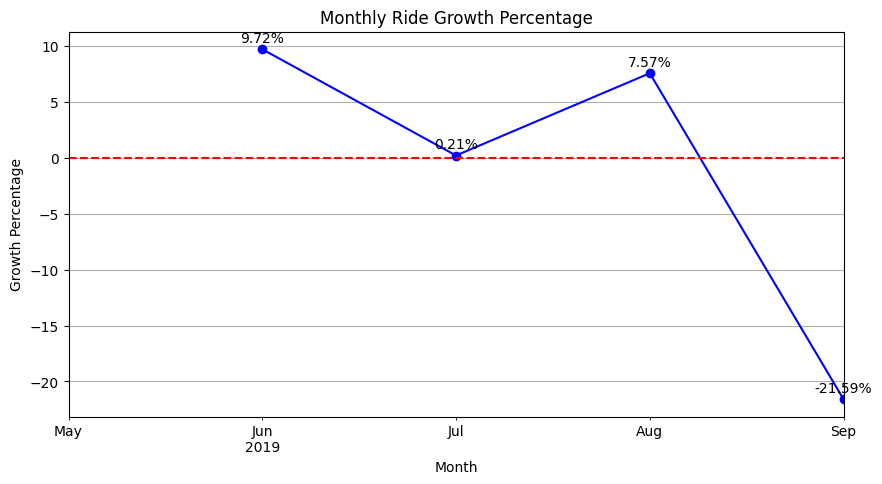

In [28]:
df['trip_month'] = df['calendar_date'].dt.to_period('M')
rides_per_month = df.groupby('trip_month')['trip_id'].count()
# Hitung growth
growth_percentage = rides_per_month.pct_change() * 100

plt.figure(figsize=(10, 5))
growth_percentage.plot(marker='o', linestyle='-', color='b')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Monthly Ride Growth Percentage')
plt.xlabel('Month')
plt.ylabel('Growth Percentage')
plt.grid(True)

for i, txt in enumerate(growth_percentage):
    plt.annotate(f'{txt:.2f}%', (growth_percentage.index[i], txt), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()

In [29]:
rides_per_month.mean()

452174.6

### 6. Pada jam-jam kapan saja trip banyak terjadi? (waktu sibuk)

In [30]:
df['trip_hour'] = df['call_time'].dt.hour
rides_per_hour = df.groupby('trip_hour')['trip_id'].count().reset_index()

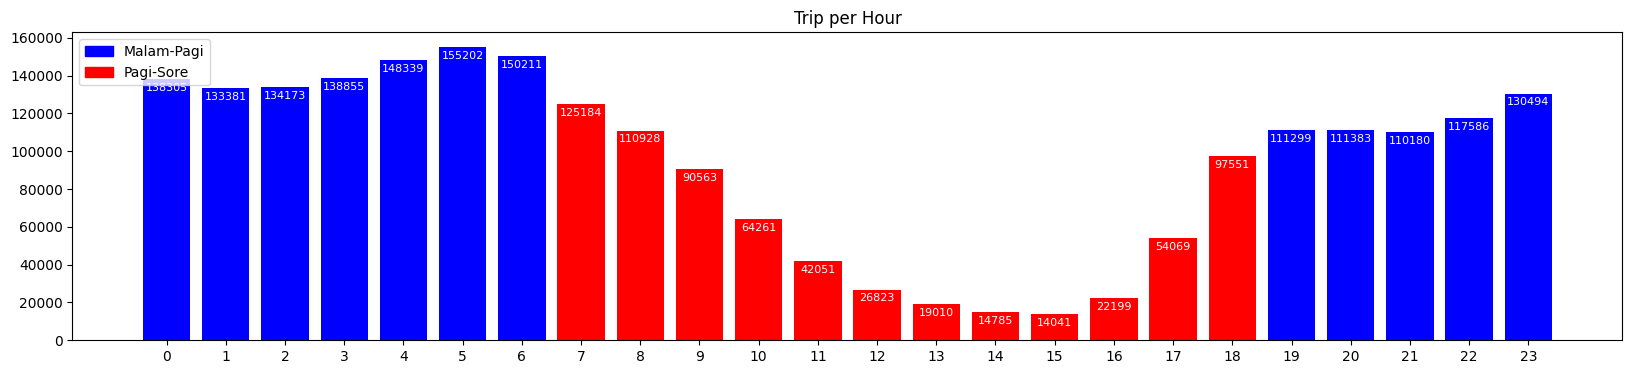

In [68]:
import matplotlib.patches as mpatches
colors = []
for hour in rides_per_hour['trip_hour']:
    if 7 <= hour <= 18:
        colors.append('red')
    elif 19 <= hour <= 23 or 0 <= hour <= 6:
        colors.append('blue')

plt.figure(figsize=(20,4))
ax1 = plt.bar(x=rides_per_hour['trip_hour'], height=rides_per_hour['trip_id'], color=colors)
for p in ax1.patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height() - 12000),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                 fontsize=8, color='white')

malam = mpatches.Patch(color='blue', label='Malam-Pagi')
siang = mpatches.Patch(color='red', label='Pagi-Sore')

plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.legend(handles=[malam, siang], loc='upper left')
plt.title('Trip per Hour')
plt.show()

Peningkatan trip sore hari (jam 17-21) disebabkan oleh mobilitas pulang kerja. Banyak orang yang baru selesai bekerja dan memesan transportasi online untuk perjalanan pulang.
Trip konstan jam 21-05 karena adanya aktivitas malam seperti pergi ke bar, klub malam, atau aktifitas sosial malam lainnya yang memicu permintaan transportasi.
Puncak trip pagi hari (jam 05) kemungkinan dipengaruhi oleh mobilitas berangkat kerja dan sekolah. Banyak orang yang berangkat di pagi hari.
Penurunan trip setelah jam 05 karena sebagian besar orang sudah tiba di tujuan. Trip menurun drastis di siang hari karena minimnya perpindahan.

In [ ]:
import matplotlib.patches as mpatches
plt.figure(figsize=(20, 4))
sns.lineplot(data=trip_per_day, x='calendar_date', y='total_trip', marker='o')

# Menambahkan penanda untuk hari libur dan akhir pekan (dengan overlap warna ungu)
for index, row in trip_per_day.iterrows():
    if row['holiday'] == 1 and row['is_weekend'] == 1:
        plt.scatter(row['calendar_date'], row['total_trip'], marker='s', color='green', s=100)
    elif row['holiday'] == 1:
        plt.scatter(row['calendar_date'], row['total_trip'], marker='X', color='red', s=100)
    elif row['is_weekend'] == 1:
        plt.scatter(row['calendar_date'], row['total_trip'], marker='o', color='orange', s=100)

weekend_patch = mpatches.Patch(color='orange', label='Weekend')
holiday_patch = mpatches.Patch(color='red', label='Holiday')
both_patch = mpatches.Patch(color='green', label='Holiday & Weekend')

plt.legend(handles=[weekend_patch, holiday_patch, both_patch], loc='center left')
# Menambahkan judul dan label sumbu
plt.title('Total Trip per Day')
plt.xlabel('Calendar Date')
plt.ylabel('Total Trip')

In [32]:
# Menghitung jumlah trip per harinya berdasarkan is_weekend
total_trip_per_weekend = df.groupby(['is_weekend', 'date_id'])['trip_id'].count()

# Menghitung rata-rata total trip per hari berdasarkan is_weekend
average_trip_per_weekend = total_trip_per_weekend.groupby('is_weekend').mean()

In [33]:
# Menghitung jumlah trip per harinya berdasarkan is_weekend
total_trip_per_holiday = df[df['is_weekend']==0].groupby(['holiday', 'date_id'])['trip_id'].count()

# Menghitung rata-rata total trip per hari berdasarkan is_weekend
average_trip_per_holiday = total_trip_per_holiday.groupby('holiday').mean()
average_trip_per_holiday

holiday
0    14675.803922
1     7560.000000
Name: trip_id, dtype: float64

In [34]:
# Menghitung jumlah trip per harinya berdasarkan is_weekend
total_trip_per_holiday = df[df['is_weekend']==1].groupby(['holiday', 'date_id'])['trip_id'].count()

# Menghitung rata-rata total trip per hari berdasarkan is_weekend
average_trip_per_holiday = total_trip_per_holiday.groupby('holiday').mean()
average_trip_per_holiday

holiday
0    17758.121951
1    20738.000000
Name: trip_id, dtype: float64

In [35]:
df.to_csv(PATH_DATA_CLEAN+"data_to_dasboard.csv", index=False)

Business Question
5. Sebutkan 5 pengemudi teratas berdasarkan jumlah perjalanan di 5 kota terbesar. (jawab di dashboard)

# Time Series Analisis

In [36]:
calendar = joblib.load(PATH_DATA_CLEAN+'calendar.pkl')
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date_id        1096 non-null   int64         
 1   calendar_date  1096 non-null   datetime64[ns]
 2   week_day       1096 non-null   object        
 3   holiday        1096 non-null   int64         
 4   is_weekend     1096 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 42.9+ KB


# ==================================================================================================================================

In [37]:
trip_per_day = df.groupby('calendar_date')['trip_id'].count().reset_index()
trip_per_day.rename(columns={'trip_id':'total_trip'},inplace=True)
trip_per_day

,calendar_date,total_trip
0,2019-05-01,1
1,2019-05-02,345
2,2019-05-03,14393
3,2019-05-04,16660
4,2019-05-05,17285
...,...,...
141,2019-09-19,16312
142,2019-09-20,16986
143,2019-09-21,19265
144,2019-09-22,18982


<AxesSubplot: xlabel='calendar_date', ylabel='total_trip'>

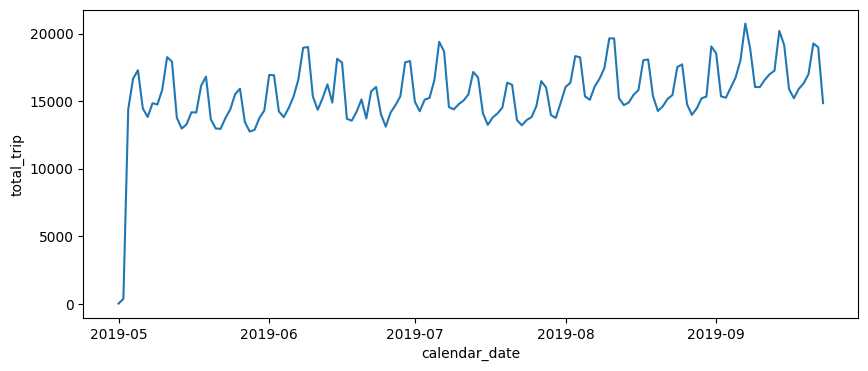

In [38]:
plt.figure(figsize=(10,4))
sns.lineplot(data=trip_per_day, x='calendar_date', y='total_trip')

In [39]:
trip_per_day = pd.merge(trip_per_day, calendar, left_on='calendar_date', right_on='calendar_date', how='left')
trip_per_day

,calendar_date,total_trip,date_id,week_day,holiday,is_weekend
0,2019-05-01,1,47209,Wednesday,1,0
1,2019-05-02,345,47210,Thursday,0,0
2,2019-05-03,14393,47211,Friday,0,0
3,2019-05-04,16660,47212,Saturday,0,1
4,2019-05-05,17285,47213,Sunday,0,1
...,...,...,...,...,...,...
141,2019-09-19,16312,47350,Thursday,0,0
142,2019-09-20,16986,47351,Friday,0,0
143,2019-09-21,19265,47352,Saturday,0,1
144,2019-09-22,18982,47353,Sunday,0,1


In [40]:
trip_per_day[trip_per_day['holiday']==1]

,calendar_date,total_trip,date_id,week_day,holiday,is_weekend
0,2019-05-01,1,47209,Wednesday,1,0
50,2019-06-20,15119,47259,Thursday,1,0
129,2019-09-07,20738,47338,Saturday,1,1


Text(0, 0.5, 'Total Trip')

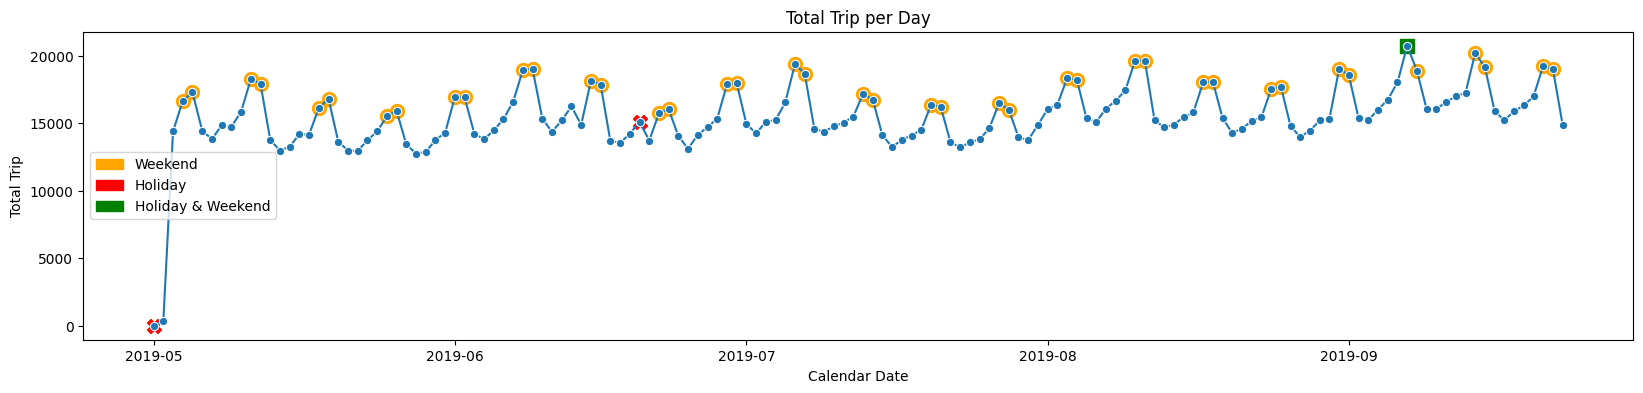

In [41]:
import matplotlib.patches as mpatches
plt.figure(figsize=(20, 4))
sns.lineplot(data=trip_per_day, x='calendar_date', y='total_trip', marker='o')

# Menambahkan penanda untuk hari libur dan akhir pekan (dengan overlap warna ungu)
for index, row in trip_per_day.iterrows():
    if row['holiday'] == 1 and row['is_weekend'] == 1:
        plt.scatter(row['calendar_date'], row['total_trip'], marker='s', color='green', s=100)
    elif row['holiday'] == 1:
        plt.scatter(row['calendar_date'], row['total_trip'], marker='X', color='red', s=100)
    elif row['is_weekend'] == 1:
        plt.scatter(row['calendar_date'], row['total_trip'], marker='o', color='orange', s=100)

weekend_patch = mpatches.Patch(color='orange', label='Weekend')
holiday_patch = mpatches.Patch(color='red', label='Holiday')
both_patch = mpatches.Patch(color='green', label='Holiday & Weekend')

plt.legend(handles=[weekend_patch, holiday_patch, both_patch], loc='center left')
# Menambahkan judul dan label sumbu
plt.title('Total Trip per Day')
plt.xlabel('Calendar Date')
plt.ylabel('Total Trip')

* Total trip tertinggi terjadi pada Holiday dan Weekend. (bagian warna hijau).
* Total trip harian tetap stabil tanpa tren naik atau turun yang signifikan. Hal ini menunjukkan adanya konsistensi dalam permintaan layanan ride sharing dari hari ke hari.


In [42]:
data_modeling_per_day = trip_per_day[['calendar_date','total_trip','holiday','is_weekend']]
joblib.dump(data_modeling_per_day, PATH_DATA_CLEAN+'dataset_modeling_day.pkl')

['../Dataset/Clean/dataset_modeling_day.pkl']

# =============================================================================

In [43]:
top_driver = df.groupby

In [44]:
trip_per_hour = df.groupby('call_time')['trip_id'].count().reset_index()
trip_per_hour.rename(columns={'trip_id':'total_trip'},inplace=True)
trip_per_hour

,call_time,total_trip
0,2019-05-01 16:00:00,1
1,2019-05-02 22:00:00,3
2,2019-05-02 23:00:00,342
3,2019-05-03 00:00:00,988
4,2019-05-03 01:00:00,899
...,...,...
3454,2019-09-23 19:00:00,858
3455,2019-09-23 20:00:00,782
3456,2019-09-23 21:00:00,793
3457,2019-09-23 22:00:00,847


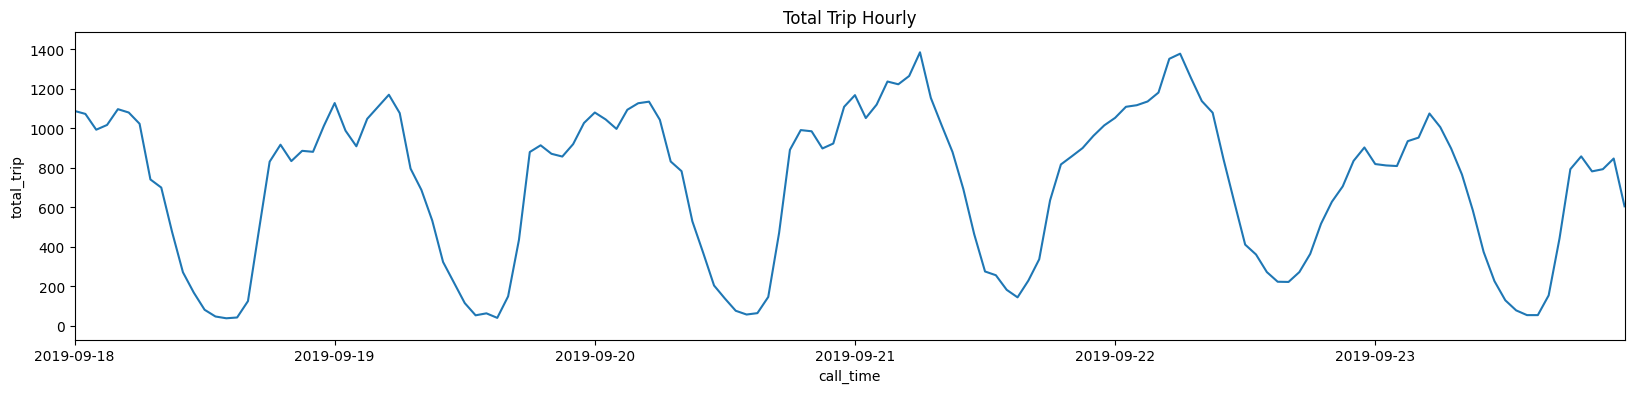

In [45]:
from datetime import datetime
plt.figure(figsize=(20,4))
sns.lineplot(data=trip_per_hour, x='call_time', y='total_trip')

# Batasi rentang sumbu x mulai dari tanggal tertentu
start_date = datetime.strptime('2019-09-18', '%Y-%m-%d')
plt.xlim(start_date, trip_per_hour['call_time'].max())
# Tampilkan grafik
plt.title("Total Trip Hourly")
plt.show()

In [46]:
trip_per_hour['call_time_date']= pd.to_datetime(trip_per_hour['call_time']).dt.floor('d')
trip_per_hour = pd.merge(trip_per_hour, calendar, left_on='call_time_date', right_on='calendar_date', how='left')
trip_per_hour.tail()

,call_time,total_trip,call_time_date,date_id,calendar_date,week_day,holiday,is_weekend
3454,2019-09-23 19:00:00,858,2019-09-23,47354,2019-09-23,Monday,0,0
3455,2019-09-23 20:00:00,782,2019-09-23,47354,2019-09-23,Monday,0,0
3456,2019-09-23 21:00:00,793,2019-09-23,47354,2019-09-23,Monday,0,0
3457,2019-09-23 22:00:00,847,2019-09-23,47354,2019-09-23,Monday,0,0
3458,2019-09-23 23:00:00,605,2019-09-23,47354,2019-09-23,Monday,0,0


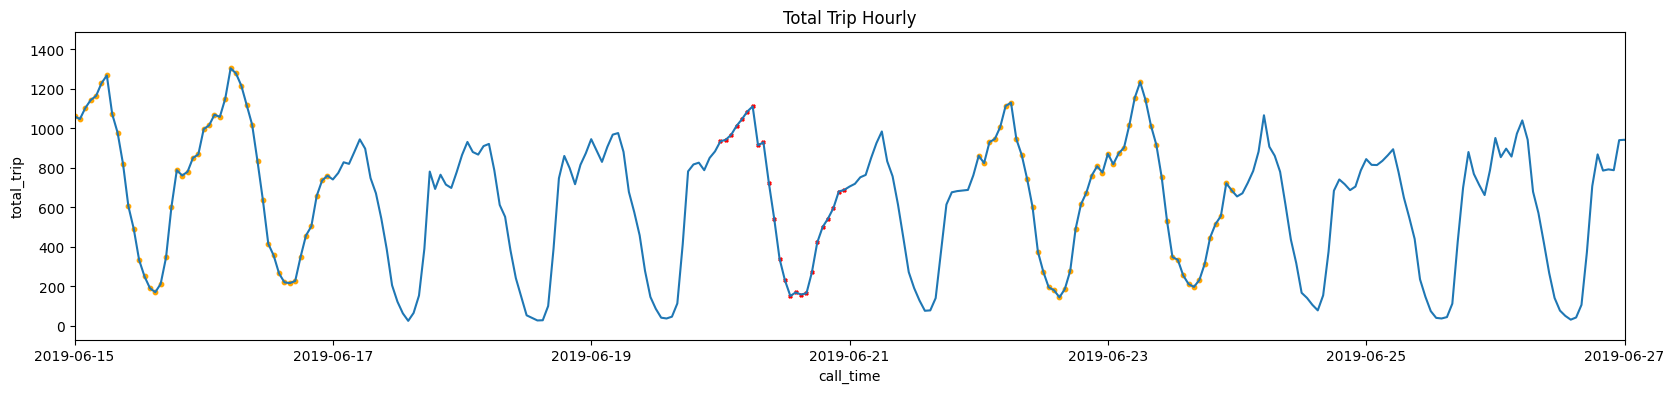

In [47]:
from datetime import datetime
plt.figure(figsize=(20,4))
sns.lineplot(data=trip_per_hour, x='call_time', y='total_trip')

# Menambahkan penanda untuk hari libur dan akhir pekan (dengan overlap warna ungu)
for index, row in trip_per_hour.iterrows():
    if row['holiday'] == 1 and row['is_weekend'] == 1:
        plt.scatter(row['call_time'], row['total_trip'], marker='X', color='purple', s=5)
    elif row['holiday'] == 1:
        plt.scatter(row['call_time'], row['total_trip'], marker='X', color='red', s=5)
    elif row['is_weekend'] == 1:
        plt.scatter(row['call_time'], row['total_trip'], marker='o', color='orange', s=10)

# Batasi rentang sumbu x mulai dari tanggal tertentu
start_date = datetime.strptime('2019-06-15', '%Y-%m-%d')
end_date = datetime.strptime('2019-06-27', '%Y-%m-%d')
plt.title("Total Trip Hourly")
plt.xlim(start_date, end_date)
# Tampilkan grafik
plt.show()

In [48]:
data_modeling_per_hour = trip_per_hour[['call_time','total_trip','holiday','is_weekend']]
joblib.dump(data_modeling_per_hour, PATH_DATA_CLEAN+'dataset_modeling_hour.pkl')

['../Dataset/Clean/dataset_modeling_hour.pkl']

# ==============================================================================================

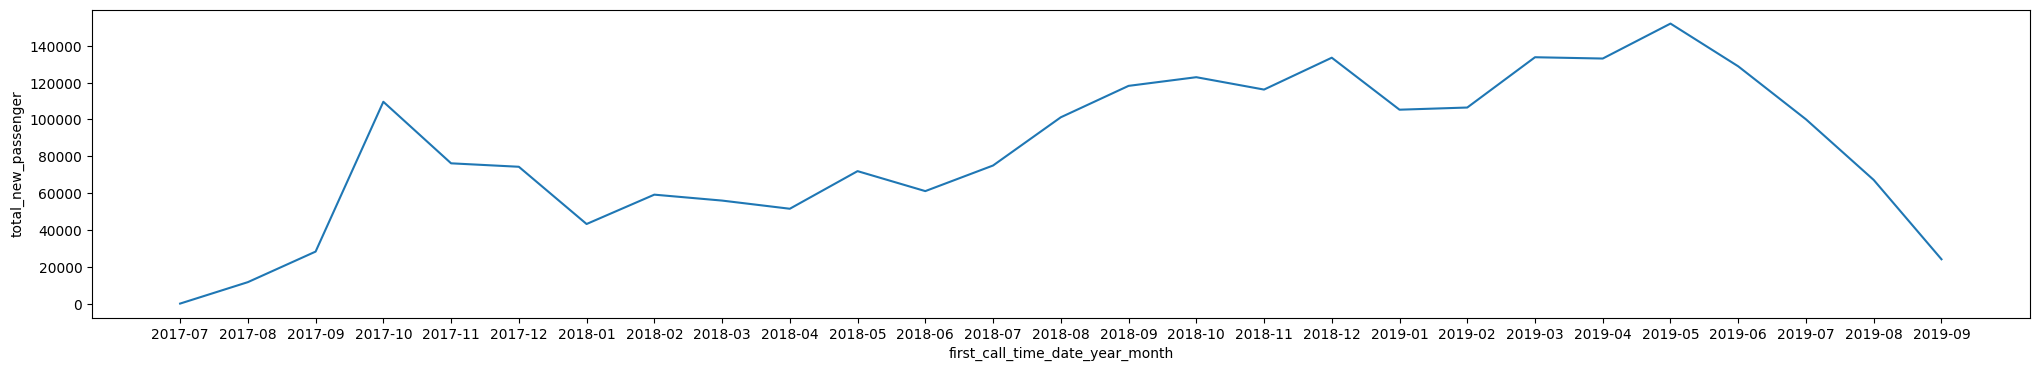

In [49]:
df['first_call_time_date_year_month'] = df['first_call_time_date'].dt.strftime('%Y-%m')

new_passenger_per_month = df.groupby(['first_call_time_date_year_month'])['trip_id'].count().reset_index()
new_passenger_per_month.rename(columns={'trip_id': 'total_new_passenger'}, inplace=True)

plt.figure(figsize=(25, 4))
sns.lineplot(data=new_passenger_per_month, x='first_call_time_date_year_month', y='total_new_passenger')
plt.show()

# =====================================================================================================

In [50]:
new_passenger_per_day = df.groupby('first_call_time_date')['trip_id'].count().reset_index()
new_passenger_per_day.rename(columns={'trip_id':'total_new_passenger'},inplace=True)
new_passenger_per_day.head()

,first_call_time_date,total_new_passenger
0,2017-07-17,1
1,2017-07-23,3
2,2017-07-24,1
3,2017-07-26,1
4,2017-07-27,1


<AxesSubplot: xlabel='first_call_time_date', ylabel='total_new_passenger'>

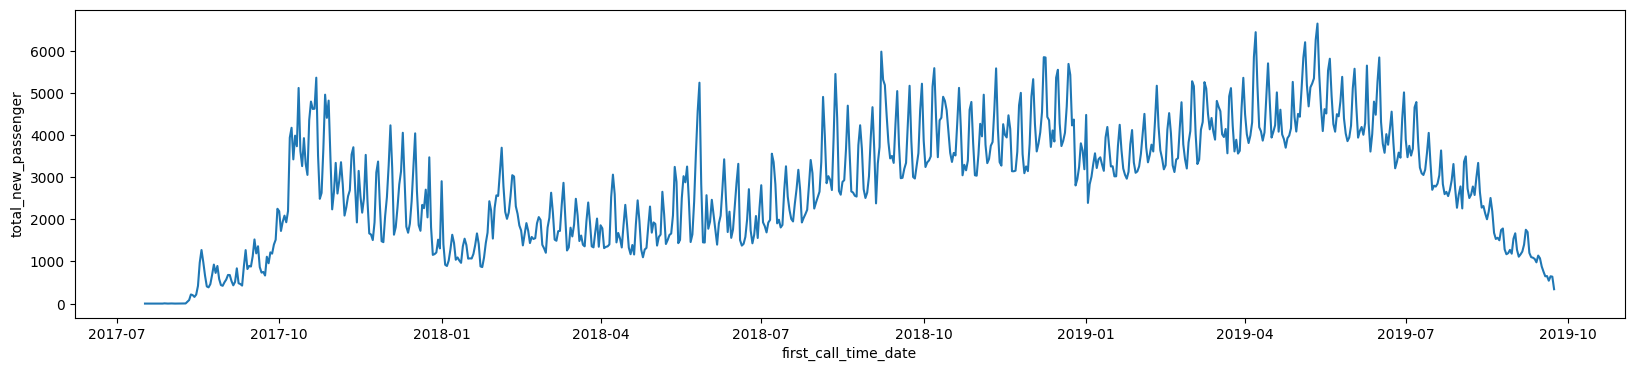

In [51]:
plt.figure(figsize=(20,4))
sns.lineplot(data=new_passenger_per_day, x='first_call_time_date', y='total_new_passenger')

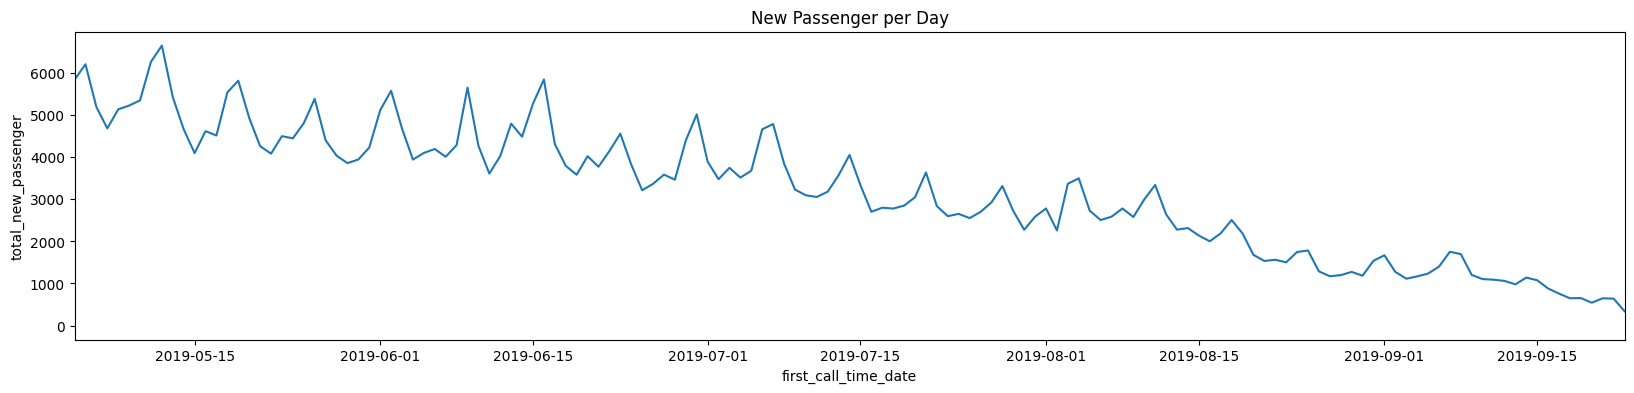

In [52]:
from datetime import datetime
plt.figure(figsize=(20,4))
sns.lineplot(data=new_passenger_per_day, x='first_call_time_date', y='total_new_passenger')

# Batasi rentang sumbu x mulai dari tanggal tertentu
start_date = datetime.strptime('2019-05-04', '%Y-%m-%d')
plt.xlim(start_date, new_passenger_per_day['first_call_time_date'].max())
# Tampilkan grafik
plt.title('New Passenger per Day')
plt.show()

In [53]:
new_passenger_per_day = pd.merge(new_passenger_per_day, calendar, left_on='first_call_time_date', right_on='calendar_date', how='left')
new_passenger_per_day.tail()

,first_call_time_date,total_new_passenger,date_id,calendar_date,week_day,holiday,is_weekend
783,2019-09-19,654,47350.0,2019-09-19,Thursday,0.0,0.0
784,2019-09-20,544,47351.0,2019-09-20,Friday,0.0,0.0
785,2019-09-21,649,47352.0,2019-09-21,Saturday,0.0,1.0
786,2019-09-22,640,47353.0,2019-09-22,Sunday,0.0,1.0
787,2019-09-23,342,47354.0,2019-09-23,Monday,0.0,0.0


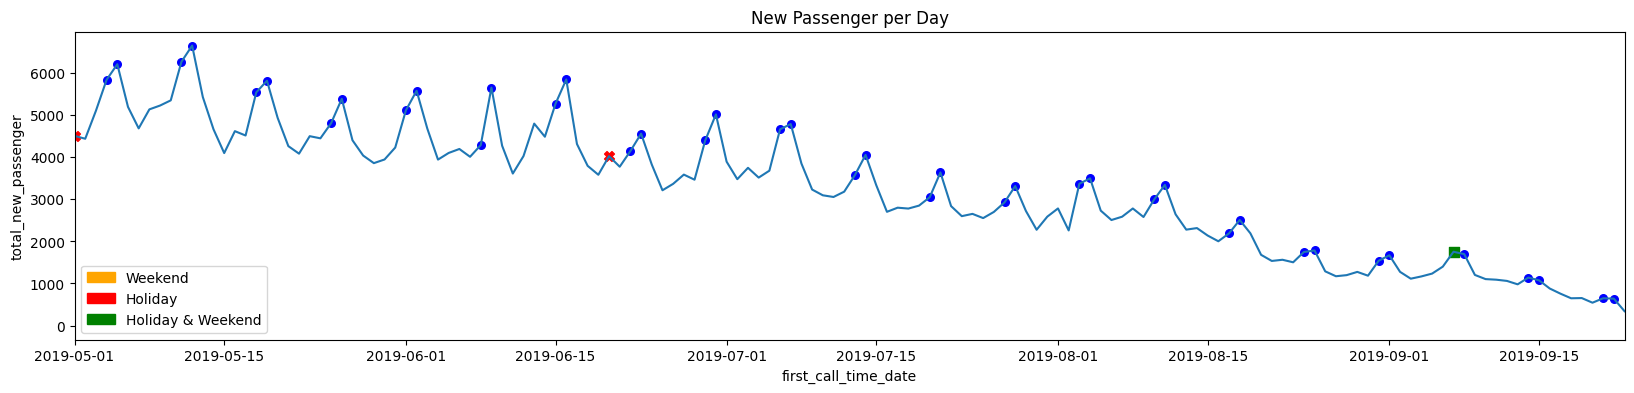

In [54]:
from datetime import datetime
plt.figure(figsize=(20,4))
sns.lineplot(data=new_passenger_per_day, x='first_call_time_date', y='total_new_passenger')

# Batasi rentang sumbu x mulai dari tanggal tertentu
start_date = datetime.strptime('2019-05-01', '%Y-%m-%d')
plt.xlim(start_date, new_passenger_per_day['first_call_time_date'].max())

# Menambahkan penanda untuk hari libur dan akhir pekan (dengan overlap warna ungu)
for index, row in new_passenger_per_day.iterrows():
    if row['holiday'] == 1 and row['is_weekend'] == 1:
        plt.scatter(row['calendar_date'], row['total_new_passenger'], marker='s', color='green', s=60)
    elif row['holiday'] == 1:
        plt.scatter(row['calendar_date'], row['total_new_passenger'], marker='X', color='red', s=50)
    elif row['is_weekend'] == 1:
        plt.scatter(row['calendar_date'], row['total_new_passenger'], marker='o', color='blue', s=30)

weekend_patch = mpatches.Patch(color='orange', label='Weekend')
holiday_patch = mpatches.Patch(color='red', label='Holiday')
both_patch = mpatches.Patch(color='green', label='Holiday & Weekend')
plt.title('New Passenger per Day')
plt.legend(handles=[weekend_patch, holiday_patch, both_patch], loc='lower left')
plt.show()

# =======================================================================================================

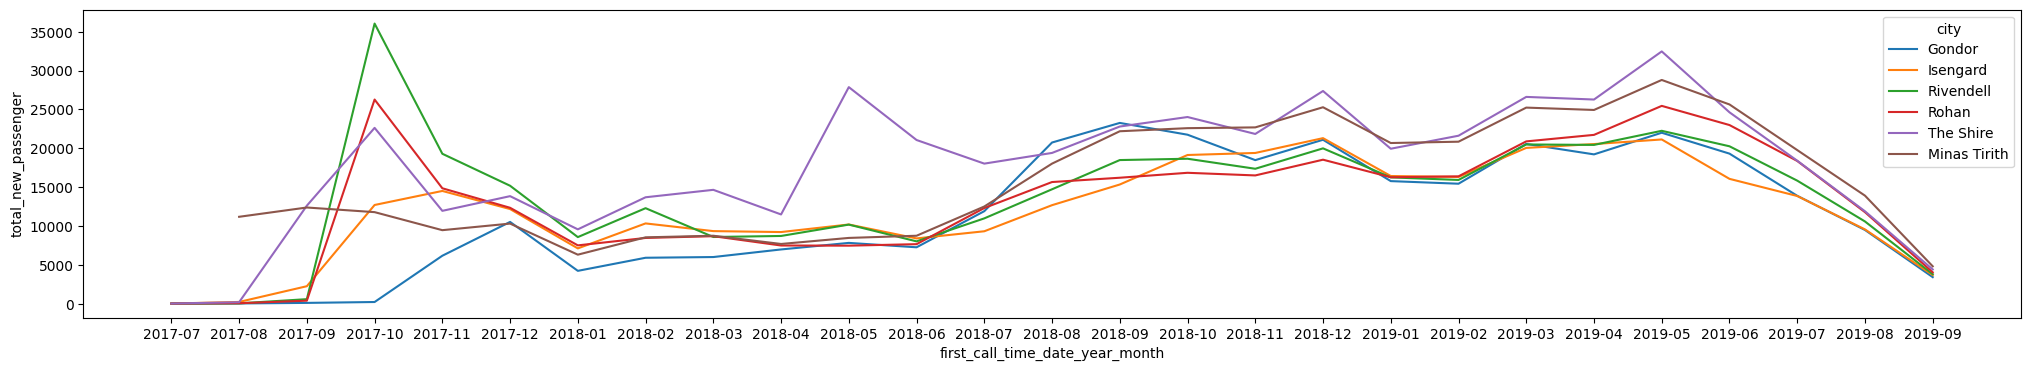

In [55]:
new_passenger_per_month_city = df.groupby(['first_call_time_date_year_month','city'])['trip_id'].count().reset_index()
new_passenger_per_month_city.rename(columns={'trip_id': 'total_new_passenger'}, inplace=True)

plt.figure(figsize=(25, 4))
sns.lineplot(data=new_passenger_per_month_city, x='first_call_time_date_year_month', y='total_new_passenger', hue='city')
plt.show()

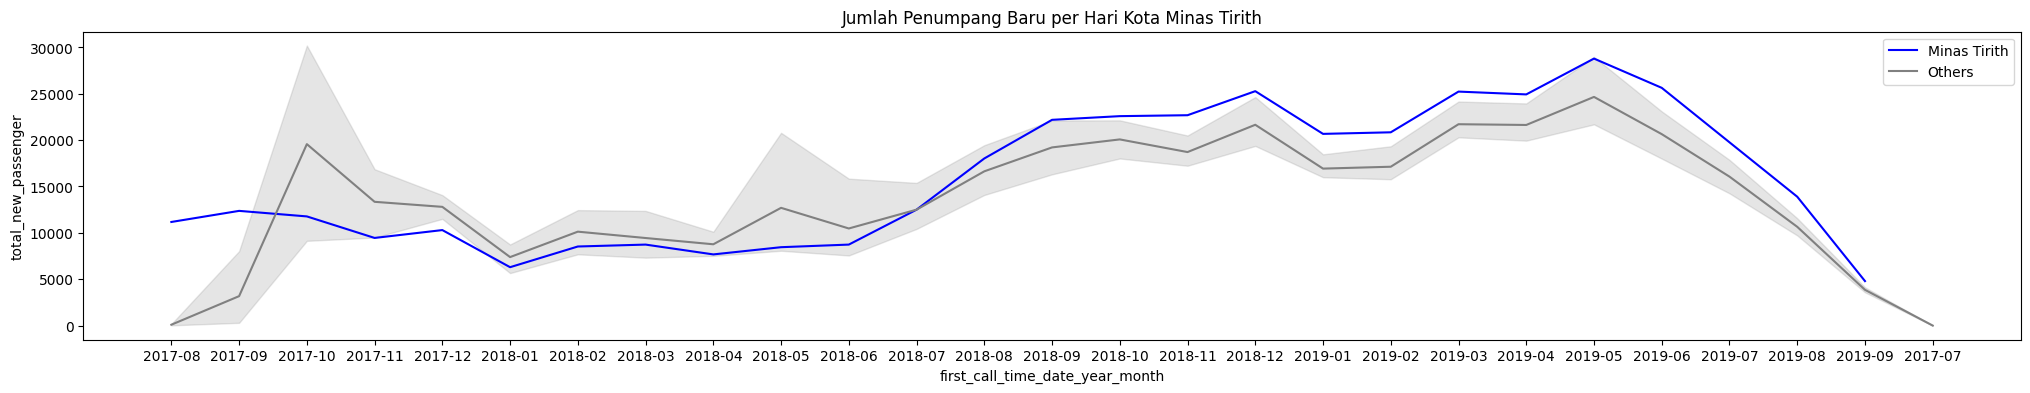

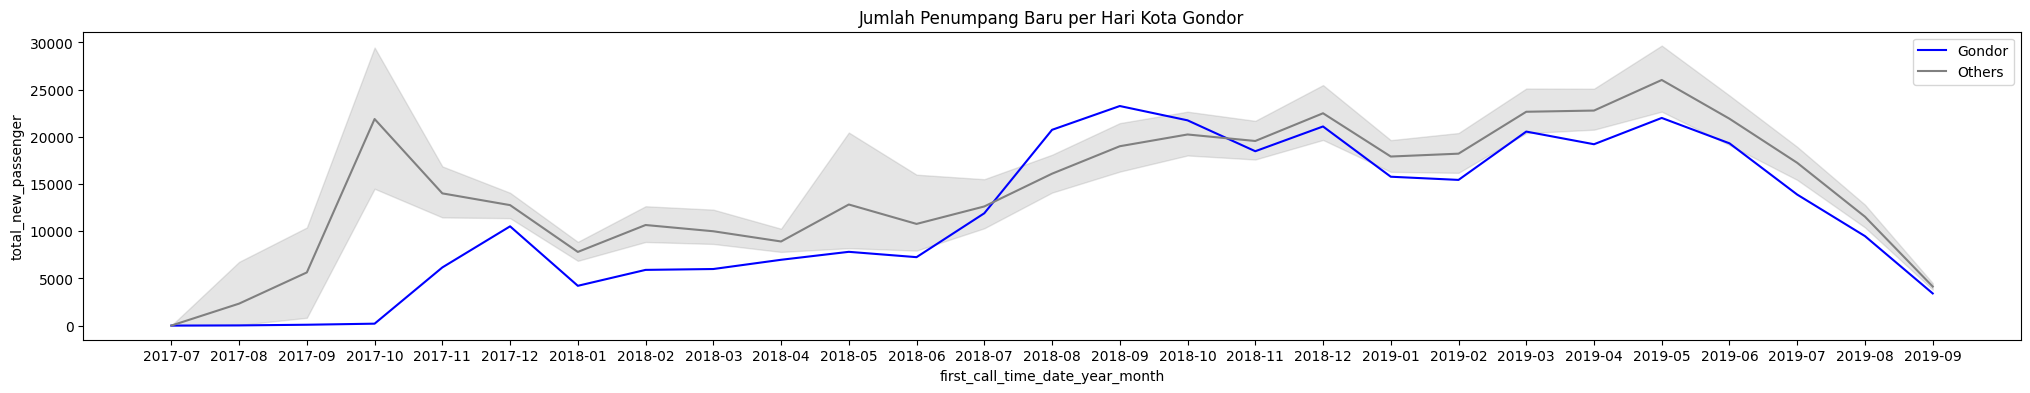

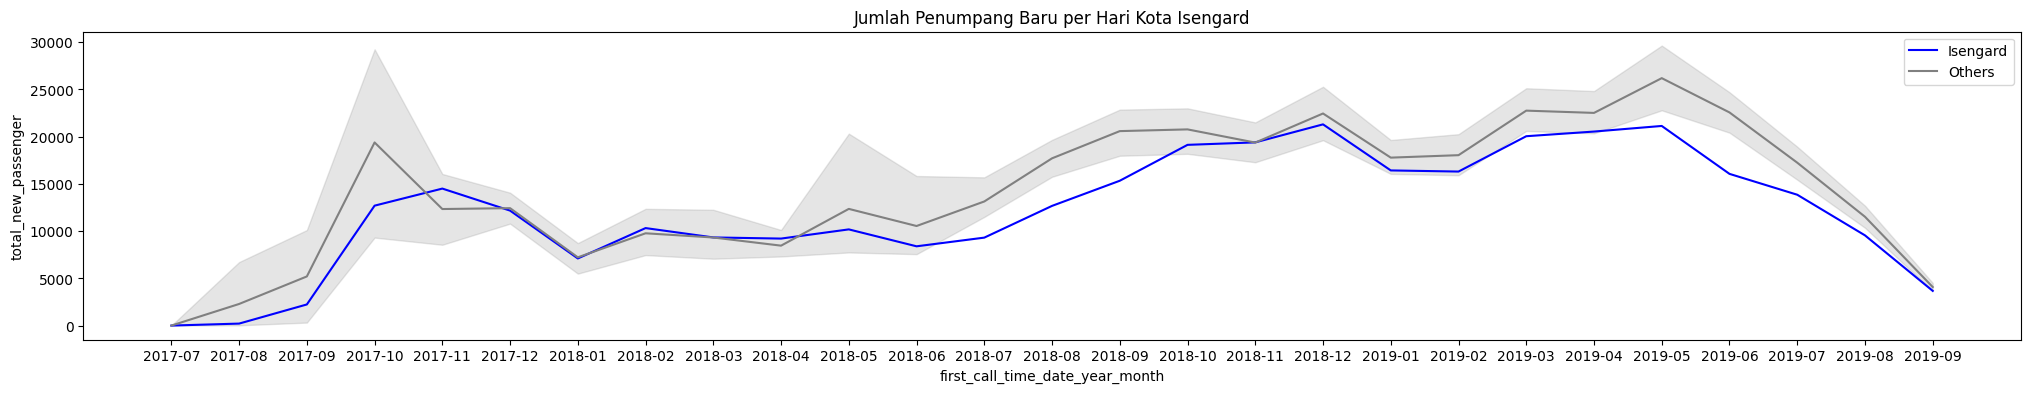

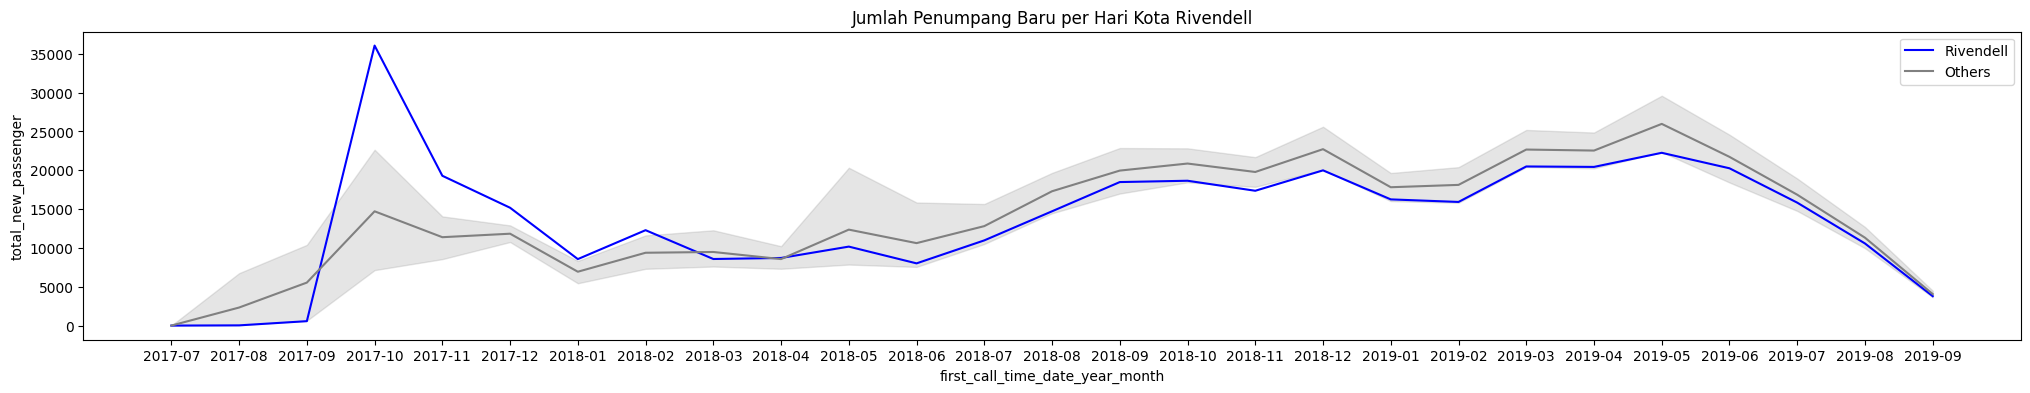

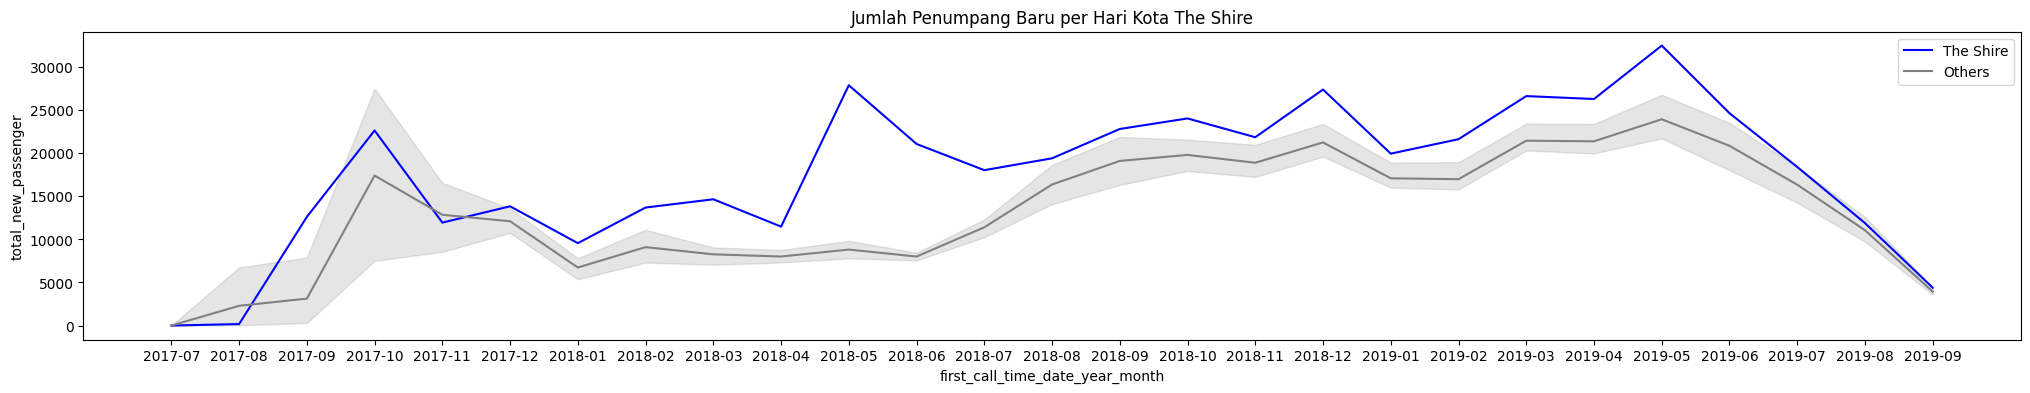

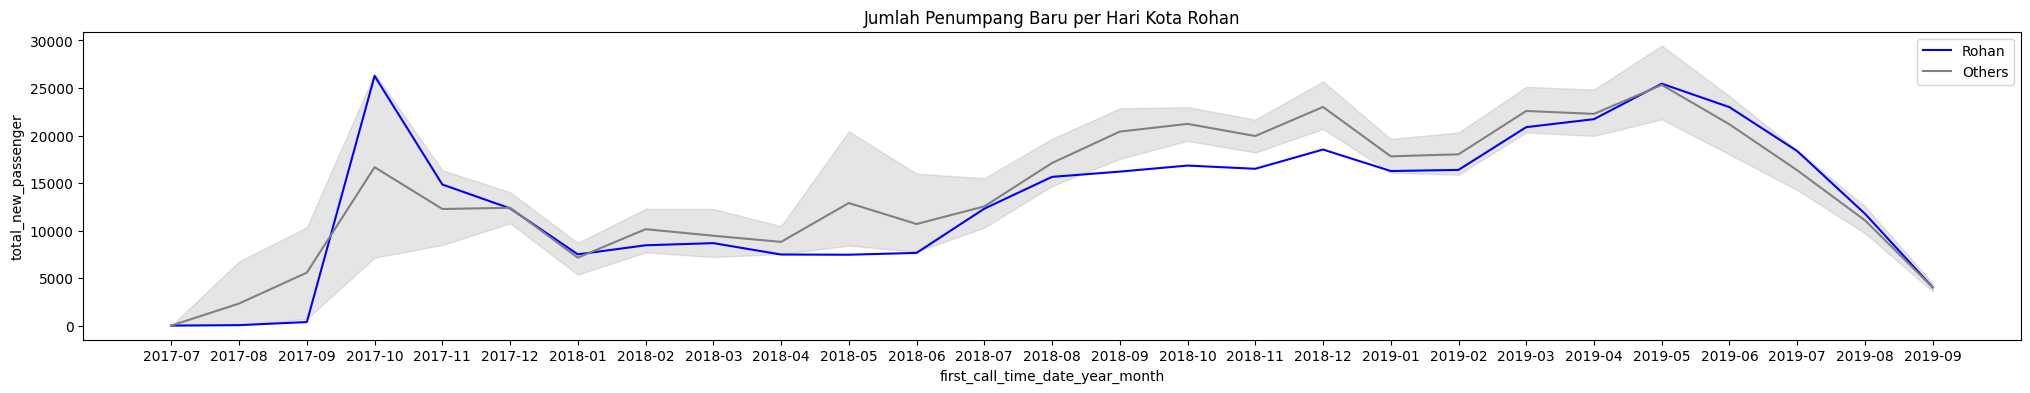

In [56]:
cities = ['Minas Tirith', 'Gondor', 'Isengard', 'Rivendell', 'The Shire', 'Rohan']

for city in cities:
    plt.figure(figsize=(25, 4))
    sns.lineplot(data=new_passenger_per_month_city[new_passenger_per_month_city['city'] == city], x='first_call_time_date_year_month', y='total_new_passenger', color='blue', label=city)
    sns.lineplot(data=new_passenger_per_month_city[new_passenger_per_month_city['city'] != city], x='first_call_time_date_year_month', y='total_new_passenger', color='gray', label='Others')
    plt.title(f'Jumlah Penumpang Baru per Hari Kota {city}')
    plt.legend()
    plt.show()

* Jumlah penumpang baru harian Kota The Shire hampir selalu diatas kota-kota yang lain. Sedangkan pada Kota Gondor jumlah penumpang barunya hampir selalu dibawah kota-kota lain.
* Perlunya strategi akuisisi penumpang baru yang lebih agresif pada Kota Gondor
* Perlu prioritaskan ekspansi armada & driver di The Shire untuk melayani basis pengguna terbesar.


# =================================================================================================

In [57]:
new_passenger_per_day2 = new_passenger_per_day.copy()
new_passenger_per_day2.drop(columns=(['date_id','calendar_date','week_day','holiday','is_weekend']), inplace=True)
trip_and_new_passenger = pd.merge(trip_per_day, new_passenger_per_day2, left_on='calendar_date', right_on='first_call_time_date', how='left')
trip_and_new_passenger.head()

,calendar_date,total_trip,date_id,week_day,holiday,is_weekend,first_call_time_date,total_new_passenger
0,2019-05-01,1,47209,Wednesday,1,0,2019-05-01,4503
1,2019-05-02,345,47210,Thursday,0,0,2019-05-02,4435
2,2019-05-03,14393,47211,Friday,0,0,2019-05-03,5099
3,2019-05-04,16660,47212,Saturday,0,1,2019-05-04,5835
4,2019-05-05,17285,47213,Sunday,0,1,2019-05-05,6203


In [58]:
trip_and_new_passenger[['total_new_passenger','total_trip']].corr()

,total_new_passenger,total_trip
total_new_passenger,1.000000,-0.152042
total_trip,-0.152042,1.000000


Text(0.5, 1.0, 'Total Trip and New Passenger')

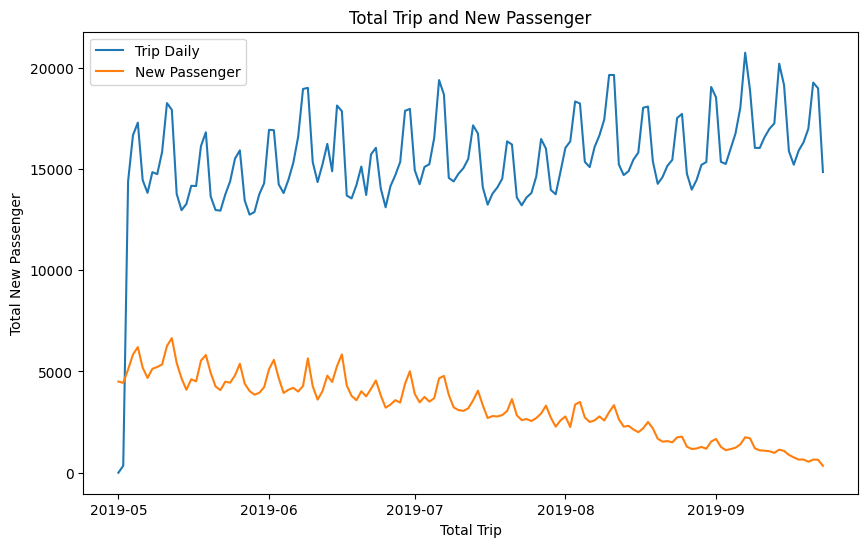

In [59]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=trip_and_new_passenger, x='calendar_date', y='total_trip', label='Trip Daily')
sns.lineplot(data=trip_and_new_passenger, x='calendar_date', y='total_new_passenger', label='New Passenger')

# Menambahkan label dan judul
plt.xlabel('Total Trip')
plt.ylabel('Total New Passenger')
plt.title('Total Trip and New Passenger')

* Adanya tren penurunan dalam jumlah penumpang baru menunjukkan bahwa pasar mungkin telah mencapai titik jenuh. 
* Ini menyarankan perlunya perluasan jangkauan layanan ride sharing ke wilayah baru atau segmentasi pasar yang belum tergarap untuk mengimbangi penurunan jumlah penumpang baru dan meningkatkan pertumbuhan jangkauan layanan.
* Selain itu, perusahaan perlu menjaga reputasi dan citra merek agar tidak terjadi penurunan jumlah trip